DAND: Titanic Project

In [34]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt

titaData = pd.read_csv("C:/Users/layal/Desktop/Titanic Project/titanic-data.csv")
#I dropped the following columns because I don't need them to answer the questions I have about this dataset
titaData = titaData.drop(["SibSp","Parch","Ticket","Cabin","Embarked"], axis=1)

First thing I did is to look at describe() and head() outputs.
Found the following interesting facts:
  Between 50% and 75% of the passengers did not survive.
  Less than 25% of the passengers were of Pclass 1.
  75% of the passengers were 38 years old or younger.
  75% of the passengers paid $31 of less to get into the ship. Average fare was $32.20.
The output of describe show the following problems with data:
  The output of count (nonNull entries) in Age is less than total number of rows.
  The minimum Fare is zero, it is a little unsual to have passengers who paid $0.

In [35]:
titaData.describe()
titaData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


I looked at rows with empty age, they look okay. I also checked if
rows with missing Age have a Fare of 0 in which case I would have discard the entire 
row, but that was not the case, therefore I choose to keep these rows
and replace the missing Age with the mean of column Age.

In [36]:
# I used print below because I was using Spyder when I wrote the code
rows_with_empty_age = titaData.loc[titaData["Age"].isnull()]
print rows_with_empty_age
print len(rows_with_empty_age.loc[titaData["Fare"].isnull()])
#Check if passengers are unique
print titaData["Name"].nunique() == len(titaData)
age_mean = titaData["Age"].mean()
titaData["Age"].fillna(age_mean, inplace = True)

     PassengerId  Survived  Pclass  \
5              6         0       3   
17            18         1       2   
19            20         1       3   
26            27         0       3   
28            29         1       3   
29            30         0       3   
31            32         1       1   
32            33         1       3   
36            37         1       3   
42            43         0       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
55            56         1       1   
64            65         0       1   
65            66         1       3   
76            77         0       3   
77            78         0       3   
82            83         1       3   
87            88         0       3   
95            96         0       3   
101          102         0       3   
107          108         1       3   
109          110         1       3   
121         

Next I look at passengers with $0 Fare and found that other cells look okay
These passengers may have been crew members.

In [37]:
print titaData.loc[titaData["Fare"]==0]

     PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0       2              Knight, Mr. Robe

I noticed that Fare field include cents to four decimal points, I'm not sure
if that was possible at that time or if this is an error. E.g., Row 1 has a Fare 
of $71.2833.
I noticed that there are so many rows that are missing the Cabin cell, but I decide
to leave these cells as NaN because there are too many to be fixed

Questions to investigate

How would the age correlate to whether the passenger survived?
How would the passanger class correlate to whether the passenger survive?
Does the passenger gender have impact on survival rate?

Following I look at a histogram of ages in general.

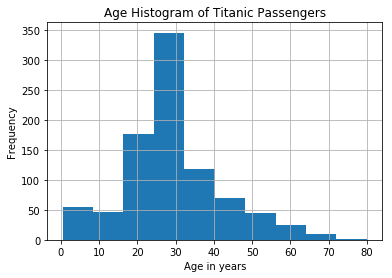

In [38]:
age_histo = titaData["Age"].hist()
age_histo.set_title("Age Histogram of Titanic Passengers")
age_histo.set_xlabel("Age in years")
age_histo.set_ylabel("Frequency")
plt.show()

The figure does not answer any of my questions listed above. But I plotted that out of curiosity. I found that the majority of
passengers is between 20 to 35 years old.
Next, I look at the gender survival rates, I put the children in their own category so they would not biase the breakdown.

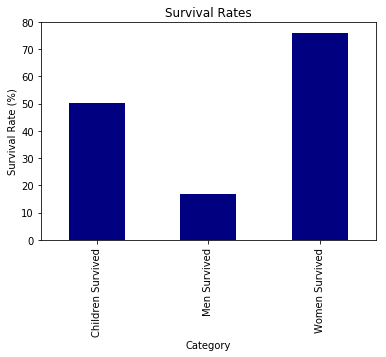

In [39]:
men_count = len(titaData[(titaData["Sex"] == "male") &
                         (titaData["Age"] > 18)])

women_count = len(titaData[(titaData["Sex"] == "female") &
                           (titaData["Age"] > 18)])
children_count = len(titaData[(titaData["Age"] <= 18)])
men_survived_count = len(titaData[(titaData["Sex"] == "male") &
                                  (titaData["Survived"] == 1) &
                                  (titaData["Age"] > 18)])

women_survived_count = len(titaData[(titaData["Sex"] == "female") &
                                  (titaData["Survived"] == 1) &
                                  (titaData["Age"] > 18)])
children_survived_count = len(titaData[(titaData["Survived"] == 1) &
                             (titaData["Age"] <= 18)])

survivalRates = {"Men Survived":men_survived_count/men_count,
                 "Women Survived":women_survived_count/women_count,
                 "Children Survived":children_survived_count/children_count}
survivalRates = pd.Series(survivalRates)
survivalRates = survivalRates*100
survivalPlot = survivalRates.plot.bar(title="Survival Rates", colormap="jet",legend=0)
survivalPlot.set_xlabel("Category")
survivalPlot.set_ylabel("Survival Rate (%)")
plt.show()

Women has the highest survival rate even higher than children at 75%. Next children have about 50% survival rate and finally men
have a survival rate of just below 20%.
Next I breakdown the ages into categories and look at the survival rate of each category.

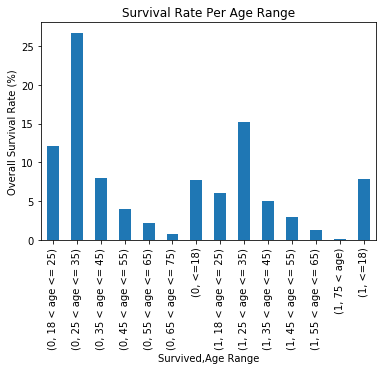

In [32]:
def ageCategory(age):
    age = int(age)
    if age <= 18:
        return "<=18"
    elif age > 18 and age <= 25:
        return "18 < age <= 25"
    elif age > 25 and age <= 35:
        return "25 < age <= 35"
    elif age > 35 and age <= 45:
        return "35 < age <= 45"
    elif age > 45 and age <= 55:
        return "45 < age <= 55"
    elif age > 55 and age <= 65:
        return "55 < age <= 65"
    elif age > 65 and age <= 75:
        return "65 < age <= 75"
    else:
        return "75 < age"
titaData["Age Range"] = titaData["Age"].apply(ageCategory)
groupedData = titaData.groupby(["Survived","Age Range"])
all_passengers_count = len(titaData)
groupedData = 100*(groupedData.count()/all_passengers_count)
plot2 = groupedData[["PassengerId"]].plot.bar(legend=0,title="Survival Rate Per Age Range")
plot2.set_ylabel("Overall Survival Rate (%)")
plt.show()

As for children less than or equal to 18 years old, this confirms be previous finding that about half of them survived.
Also, Age Range of (25,35] has the highest mortality rate and highest survival rates just because most passengers were of this category. As the Age Range gets higher number of survivors gets smaller compared to number of mortalities. Passengers ability to 
escape such a catastrophic event would decrease with age. There is an exception of one 80 years old passenger who survived.
Finally, I look at the survival rate for each of the three classes.

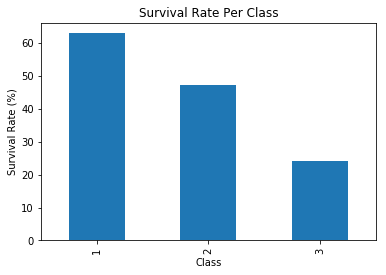

In [33]:
survivedData = titaData.drop(titaData[titaData["Survived"] == 0].index)
surivivalRatesPerClass = 100 * (survivedData.groupby(["Pclass"])["PassengerId"].count() /\
                               titaData.groupby(["Pclass"])["PassengerId"].count())
plot3 = surivivalRatesPerClass.plot.bar(legend=0,title="Survival Rate Per Class")
plot3.set_xlabel("Class")
plot3.set_ylabel("Survival Rate (%)")
plt.show()

The figure shows that class 1 passengers have the highest survival rate of just above 60%. The second highest rate is for class 2 with a survival rate of about 45% and class 3 has the lowest survival rate of about 22%.
This might be due to class 1 being loaded first to the rescue boats, or maybe it is a result of having fewer passenger in class 1 compared to class 2 and 3 so more passengers were successfuly rescued relative to the overall passengers in that class.